<a href="https://colab.research.google.com/github/jae-gyeong/deep-learning/blob/master/2019_09_23(%EC%9D%B8%EB%94%94%EC%96%B8%EB%8B%B9%EB%87%A8%EB%B3%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
np.random.seed(5)

In [0]:
# 파일 가져오기
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving pima-indians-diabetes.csv to pima-indians-diabetes (3).csv
User uploaded file "pima-indians-diabetes.csv"" with length 24045 bytes


In [0]:
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

In [0]:
# 데이터 셋 설정하기
x_train = dataset[:700,0:8]
y_train = dataset[:700,8]
x_test = dataset[700:, 0:8]
y_test = dataset[700:,8]

In [0]:
y_test

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [0]:
# 모델 구성하기
model = Sequential()
model.add(Dense(12,input_dim=8, activation='relu'))
model.add(Dense(8,activation='relu' ))
model.add(Dense(1,activation='sigmoid' )) # 출력층 1개

In [0]:
# 모델 학습과정 설정하기 - 이진분류
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=1500, batch_size=64) # batch_size - 가중치를 업데이트 시키는 단위


Epoch 1/1500
700/700 [==============================] - 0s 439us/step - loss: 4.3943 - acc: 0.6557
Epoch 2/1500
700/700 [==============================] - 0s 41us/step - loss: 3.6819 - acc: 0.6457
Epoch 3/1500
700/700 [==============================] - 0s 34us/step - loss: 3.4794 - acc: 0.6129
Epoch 4/1500
700/700 [==============================] - 0s 31us/step - loss: 3.1245 - acc: 0.6329
Epoch 5/1500
700/700 [==============================] - 0s 39us/step - loss: 2.6725 - acc: 0.6629
Epoch 6/1500
700/700 [==============================] - 0s 34us/step - loss: 2.1520 - acc: 0.6629
Epoch 7/1500
700/700 [==============================] - 0s 30us/step - loss: 1.7035 - acc: 0.6257
Epoch 8/1500
700/700 [==============================] - 0s 36us/step - loss: 1.4331 - acc: 0.5914
Epoch 9/1500
700/700 [==============================] - 0s 34us/step - loss: 1.2177 - acc: 0.6229
Epoch 10/1500
700/700 [==============================] - 0s 37us/step - loss: 1.1226 - acc: 0.6429
Epoch 11/1500
700

In [0]:
# 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 124us/step
acc: 76.47%


In [0]:
scores

[0.5658652431824628, 0.7647058823529411]

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'epoch'), Text(0.5, 1.0, 'model loss')]

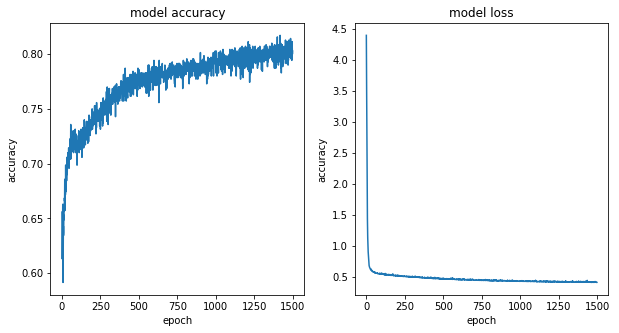

In [0]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5))

# 모델의 정확도
ax0.plot(hist.history['acc'])
ax0.set(title='model accuracy', xlabel='epoch', ylabel='accuracy')
# 모델의 오차
ax1.plot(hist.history['loss'])
ax1.set(title= 'model loss', xlabel='epoch', ylabel='accuracy')

In [0]:
patient = np.array([[0,137,90,35,168,43.1,2.228,33]])

#모델 예측하기
prediction = model.predict(patient)

print(prediction)

[[0.6877302]]
